# Annual Medical Costs
I grew up in Southeast Asia where medical care was cheap, and there was never a worry about who was going to pay the bill. Upon moving to the United States for my undergraduate degree, I began hearing much about how exorbitant medical costs were and how dysfunctional the entire medical system was. Within a few medical visits, I began understanding exactly why this was such a 'hot topic'. For this reason, I decided to take look at a dataset to really understand the costs among different groups of people in the United States. I found a public domain dataset from Kaggle with a total 1338 patients and the annual medical charges they were billed (including insurance). This dataset has the following variables: age, sex, BMI, number of children, if the person is a smoker, and region of the United States where the patient was treated. I sought to examine the following questions: 

- How does age affect medical costs? 
- Is there a difference in annual medical costs between males and females?
- If there is a difference of annual medical costs between sex, how does this vary with age?
- Do smokers have higher annual medical costs? How does this compare with age and sex?


No missing values, NaNs, or obscure values were found in the dataset. A simple summary and distribution of the dataset is shown below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

# Medical Cost Personal Dataset found from kaggle: https://www.kaggle.com/mirichoi0218/insurance/data
med = pd.read_csv("/Users/N1/Desktop/Interesting Data Sets/insurance.csv")

In [2]:
# There are no missing values
med.isnull().values.any()

False

### Statistical Summary of Medical Cost Dataset

In [3]:
# Get an idea of the data
med.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Distribution of the Data

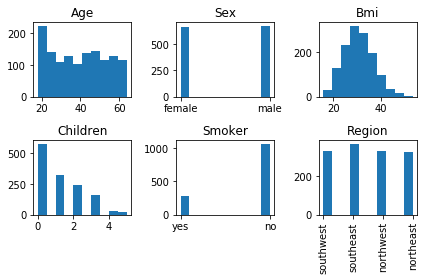

In [4]:
# Looking at distribution of the data
plt.subplot(231)
plt.title('Age')
plt.hist(med.age)

plt.subplot(232)
plt.hist(med.sex)
plt.title('Sex')

plt.subplot(233)
plt.hist(med.bmi)
plt.title('Bmi')

plt.subplot(234)
plt.hist(med.children)
plt.title('Children')

plt.subplot(235)
plt.hist(med.smoker)
plt.title('Smoker')

plt.subplot(236)
plt.hist(med.region)
plt.title('Region')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

### Response Variable
The response variable, Charges is not normal. Logging it and taking the square root did not improve the normality. 

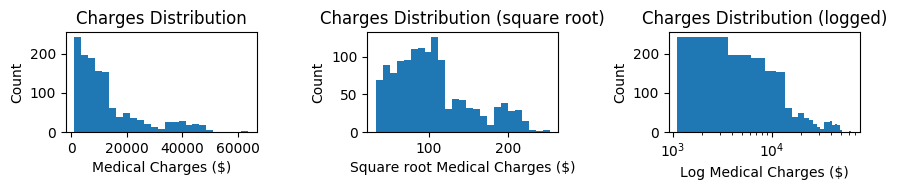

In [5]:
# Response variable (charges) is not normal
figure(num=None, figsize=(9, 2), dpi=100)
plt.subplot(131)
plt.title('Charges Distribution')
plt.xlabel('Medical Charges ($)')
plt.ylabel('Count')
plt.hist(med.charges, bins = 25)

# Logging the response variable or exponentiating it to the .5 does not help
plt.subplot(132)
med['charges1'] = med.charges**(1/2)
plt.title('Charges Distribution (square root)')
plt.xlabel('Square root Medical Charges ($)')
plt.ylabel('Count')
plt.hist(med.charges1, bins = 25)

plt.subplot(133)
plt.title('Charges Distribution (logged)')
plt.xlabel('Log Medical Charges ($)')
plt.ylabel('Count')
plt.xscale('log')
plt.hist(med.charges, bins = 25)
plt.tight_layout()

plt.show()

### How does age affect medical costs?

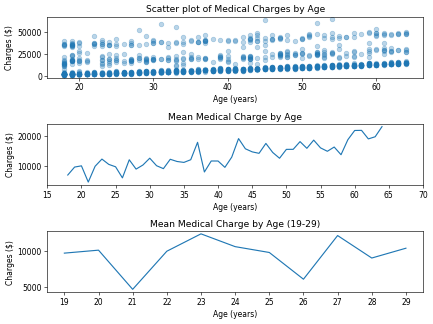

In [6]:
#Scatter plot of age and charges

figure(num=None, figsize=(8, 6), dpi=55)
plt.subplot(311)
plt.title("Scatter plot of Medical Charges by Age")
plt.xlabel("Age (years)")
plt.ylabel("Charges ($)")
plt.scatter(med.age, med.charges, alpha = .3)

#Scatterplot of mean charge by age
plt.subplot(312)

age = med.groupby('age')['charges'].mean()

plt.title("Mean Medical Charge by Age")
plt.xlabel("Age (years)")
plt.ylabel("Charges ($)")
plt.plot(age)
plt.xticks([15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])

# Age over 26 is when you get off parents insurance
# Investigating if charges are higher when off parents insurance
med2 = med.copy()
med2age = med2[(med2['age'] >= 19) & (med2['age'] <= 29)]
age2 = med2age.groupby('age')['charges'].mean()

plt.subplot(313)
plt.title("Mean Medical Charge by Age (19-29)")
plt.xlabel("Age (years)")
plt.ylabel("Charges ($)")
plt.tight_layout()
plt.xticks([19,20,21,22,23,24,25,26,27,28,29])
plt.plot(age2)
plt.show()

The above plots look at the relationship between age and annual medical charges for all patients in the dataset. The first plot displays all the data points, which show a positive trend. Both minimum and maximum medical charges appear to increase with age. Looking at the second plot, we can see that this is indeed the case by looking at the median medical charge. An interesting feature found was that by looking within the first 30 years of life, the two local minimums occur at age 21 and at age 26. This is better shown in the third plot. While it may be hard to discern a reason why these two ages have the lowest annual medical charges, we postulate that age 26, when a person must leave their parent's medical insurance plan, they may be less likely to see a doctor for medical concerns due to the costs they now must pay for a doctor’s visit or buy a cheaper insurance plan. At age 21, we can conjecture that as one leaves college and begins working, they may have less time to see a doctor, thus resulting in lower medical bills. Ultimately, it is apparent that medical costs increase steadily with age.

### Is there a difference in medical costs between males and females?

<BarContainer object of 2 artists>

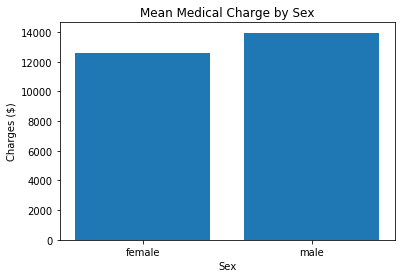

In [7]:
sex = med.groupby("sex")['charges'].mean()

plt.title("Mean Medical Charge by Sex")
plt.xlabel("Sex")
plt.ylabel("Charges ($)")
plt.bar(sex.index, sex)

In [8]:
diff = sex['male']/sex['female'] * 100 - 100
print(f'\n Males are charged approximately {diff.round(2)}% more than females.')


 Males are charged approximately 11.04% more than females.


### How does this sex different cost vary with age?

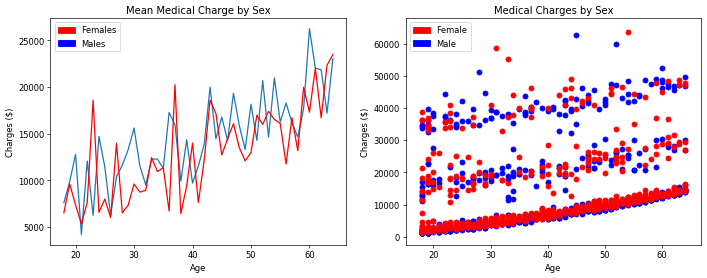

In [9]:
figure(num=None, figsize=(14, 5), dpi=60)

#Looking at cost by age and sex
agesex = med.groupby(["sex", 'age'])['charges'].mean()

male = agesex['male']
female = agesex['female']

plt.subplot(121)
plt.title("Mean Medical Charge by Sex")
plt.xlabel("Age")
plt.ylabel("Charges ($)")
plt.plot(male)
plt.plot(female, color = 'r')
red = mpatches.Patch(color='red', label='Females')
blue = mpatches.Patch(color='blue', label='Males')
plt.legend(handles=[red,blue])

# Scatter
male1 = med[med['sex'] == 'male']
female1 = med[med['sex'] == 'female']

plt.subplot(122)
plt.scatter(male1.age, male1.charges, color = 'b')
plt.scatter(female1.age, female1.charges, color = 'r')
red = mpatches.Patch(color='red', label='Female')
blue = mpatches.Patch(color='blue', label='Male')
plt.legend(handles=[red,blue], loc = 'upper left')
plt.xlabel("Age")
plt.ylabel("Charges ($)")
plt.title('Medical Charges by Sex')
plt.show()

Based on the dataset, the bar chart above shows that males are charged approximately 11.04% more for their medical visits than females. This could be simply due to the dataset only having 1338 patients, or possibly the type of medical care needed during that patients visit, although it is hard to establish if it is. If we look at the mean medical cost line plot, we see that while females and males do follow the same trend, it appears that females in this dataset are charged slightly less for their medical visits across most ages. However, looking at the scatter plot of medical charges by sex, we see that the cost for females has a much higher variance than males. In addition, females appear to have more outliers, that are high annual cost, than males. This explains the spikes seen in the mean medical charge by sex line plot.

### Do smokers have higher annual medical costs? How does this compare with age and sex?

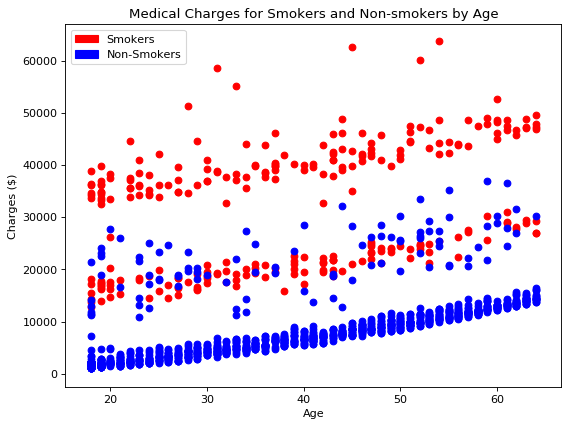

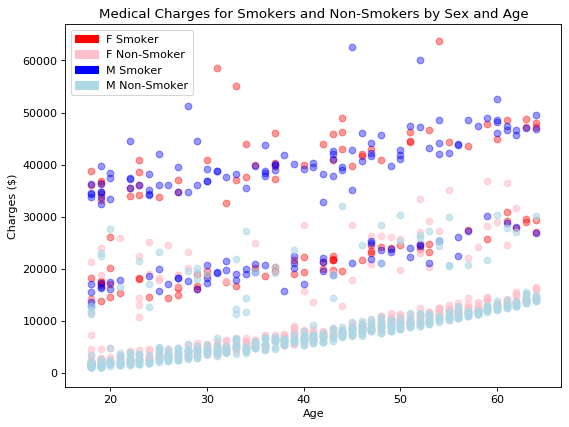

In [10]:
#Smoking and non-smoking
smoke = med[med['smoker'] == 'yes']
nosmoke = med[med['smoker'] == 'no']

figure(num=None, figsize=(8, 6), dpi=80)
plt.scatter(smoke.age, smoke.charges, color = 'r')
plt.scatter(nosmoke.age, nosmoke.charges, color = 'b')

red = mpatches.Patch(color='red', label='Smokers')
blue = mpatches.Patch(color='blue', label='Non-Smokers')

plt.legend(handles=[red,blue], loc = 'upper left')
plt.title('Medical Charges for Smokers and Non-smokers by Age')
plt.xlabel("Age")
plt.ylabel("Charges ($)")
plt.show()

fsmoke = smoke[smoke['sex'] == 'female']
fnosmoke = nosmoke[nosmoke['sex'] == 'female']
msmoke = smoke[smoke['sex'] == 'male']
mnosmoke = nosmoke[nosmoke['sex'] == 'male']

#Smoking and non-smoking by sex
figure(num=None, figsize=(8, 6), dpi=80)
plt.scatter(fsmoke.age, fsmoke.charges, color = 'r', alpha = .4)
plt.scatter(fnosmoke.age, fnosmoke.charges, color = 'pink', alpha = .6)
plt.scatter(msmoke.age, msmoke.charges, color = 'blue', alpha = .4)
plt.scatter(mnosmoke.age, mnosmoke.charges, color = 'lightblue', alpha = .6)

red = mpatches.Patch(color='red', label='F Smoker')
pink = mpatches.Patch(color='pink', label='F Non-Smoker')
blue = mpatches.Patch(color='blue', label='M Smoker')
lightblue = mpatches.Patch(color='lightblue', label='M Non-Smoker')

plt.legend(handles=[red,pink, blue, lightblue], loc = 'upper left')
plt.xlabel("Age")
plt.ylabel("Charges ($)")
plt.title('Medical Charges for Smokers and Non-Smokers by Sex and Age')
plt.show()

Based on the two plots above, it is very clear that smokers have higher annual medical costs than those who are not smokers. When we look at the plot for medical charges for smokers and non-smokers by sex and age, we see that smokers, regardless of sex, generally have higher medical charges than males and females who do not smoke. In the bottom plot, there are 3 clear trends that can be seen. The topmost trend is both male and female smokers, the middle trend cluster contains a mix of all 4 groups; male and female smokers and non-smokers, and the bottom trend includes only those who are not smokers. The fact that there are three clusters as age progresses suggests that there may be another important factor involved in the middle cluster. Perhaps those patients could be located in one area of the United States, or perhaps it has something to do with genetics. It is not possible to tell based on the data. Those who smoke also vary a lot more in medical costs than those who do not smoke. Smoking is known to be bad for one’s health and it is not surprising that those who smoke have higher medical costs. The lack of difference between males and females suggest that the difference seen before in the cost based on sex and age plot was simply due to the higher variance of females.

# Summary

In this presentation, I have looked at the annual medical cost for patients based on their age, sex, and whether or not he or she is a smoker. It was found that as age progresses, so does annual medical care cost. However, at age 26, we see a dip in the annual cost. This is likely due to people who are then forced to leave their parents insurance plans, moving to cheaper plans and possibly visiting the doctor less to avoid spending money. In this dataset, males, when compared to females, across all ages, were charged an average of 11.04% more than females. This trend stayed apparent as healthcare cost was analyzed in combination with age. It was also found that females varied much more in annual health care costs in this dataset. Whether or not these are real effects is questionable due to the small sample size. This difference in spending is contrary to many healthcare studies that have been published which have shown that females spend a far higher amount than males on annual healthcare, especially between ages 18-30. It was found that smokers generally spend far more on their annual healthcare than those who did not smoke. Smoking is well documented to be detrimental to lead to someone’s health and increases the risk multiple types of cancers of tissues involved in the respiratory track. Further, when examining smokers and non-smokers by sex, no large distinction was found between males and female non-smokers when compared to male and female smokers. This suggests that regardless of sex, smoking will affect the health of the individual to the same degree, leading to similar increases in annual healthcare costs. Interestingly, it was found that there was a clustering trend of smokers and non-smokers of both sexes in terms of annual healthcare costs that lie between most non-smokers and smokers. Without additional data, it is not possible to discern why this may be. There could be certain genetic components leading to this outcome or possibly, this could be based on where in the U.S. treatment was recieved as medical costs vary depending on where one resides. Further investigation is required to understand why this annual healthcare cost clustering is present.